In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
#Reading csv file using pandas
df=pd.read_csv('hack_startup_funding.csv')

In [3]:
#Checking the head files
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


#### Possible questions which could be answered are:
#### ● How does the funding ecosystem change with time?
#### ● Do cities play a major role in funding?
#### ● Which industries are favored by investors for funding?
#### ● Who are the important investors in the Indian Ecosystem?
#### ● How much funds do startups generally get in India?

In [4]:
#Droppin irrelevant columns
df.drop(['SNo','Remarks'],axis=1,inplace=True)

In [5]:
#Checking data again
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


## Except dates and amount in usd columns all other features are categorical
## We will take each row engineer them and do eda 

### 1) Date

In [6]:
#First step is to convert object into date time to do this we need to first structure the data
df['Date']=df['Date'].replace({"12/05.2015":"12/05/2015"})
df['Date']=df['Date'].replace({"13/04.2015":"13/04/2015"})
df['Date']=df['Date'].replace({"22/01//2015":"22/01/2015"})
df['Date']=df['Date'].replace({"15/01.2015":"15/01/2015"})

In [7]:
#Converting date column into type date
df['Date']=pd.to_datetime(df['Date'])

In [8]:
#Extracting month from date column
df['month']=df['Date'].dt.month

In [9]:
#Extracting year from date column

df['year']=df['Date'].dt.year

In [10]:
#Extracting year from date column

df['quarter']=df['Date'].dt.quarter

In [11]:
#Extracting days from date column

df['day']=df['Date'].dt.day

In [12]:
#Combining year and month together
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+ (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [13]:
year_month = df['yearmonth'].dropna().value_counts()

In [14]:
#Dropping date column as we have all the information extracted
df.drop('Date',axis=1,inplace=True)

In [15]:
#Calculating percentage of all the date categories for eda
year=df['year'].value_counts()/len(df['year'])*100
month=df['month'].value_counts()/len(df['month'])*100
quarter=df['quarter'].value_counts()/len(df['quarter'])*100
day=df['day'].value_counts()/len(df['day'])*100

#### ● How does the funding ecosystem change with time?


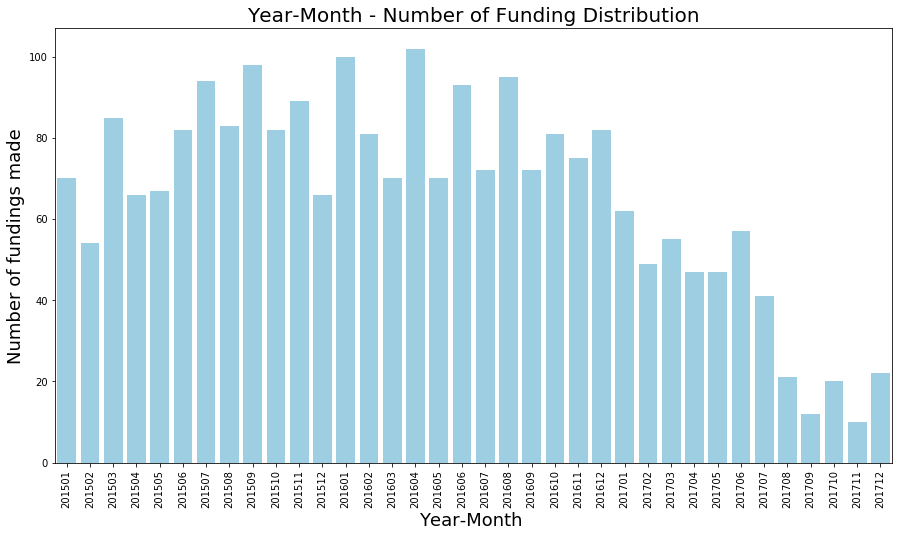

In [16]:
#Plotting funding according to its timeline
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Year-Month ', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Year-Month - Number of Funding Distribution", fontsize=20)
plt.show()
#There seems to be no trend in the amount of funding that has been made
#but from 201612 to 201712 the funding has been gradually dropped

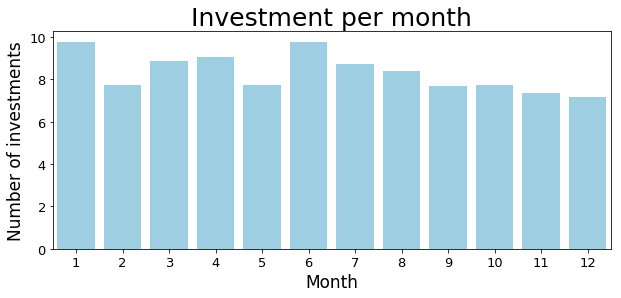

In [17]:
#Checking if there is trend in investment as per month
plt.figure(figsize=(10,4))
sns.barplot(month.index, month.values, alpha=0.9,color='skyblue')
plt.title('Investment per month',fontsize=25)
plt.xlabel('Month',fontsize=17)
plt.ylabel('Number of investments',fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
#There does not seem to be any trend but January and June seems to have the most number of investments

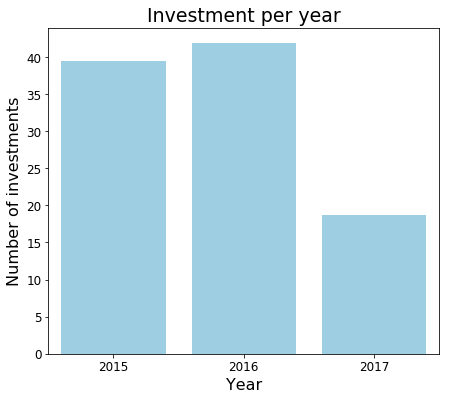

In [18]:
#PLotting funding frequency according to year
plt.figure(figsize=(7,6))
sns.barplot(year.index, year.values, alpha=0.9,color='skyblue')
plt.title('Investment per year',fontsize=19)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of investments',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#It looks like funding has increased from 2015 to 2016. 
#It makes sense if the funding for 2017 will be greater than 2016
#But we have data for 2017 till october so we cannot really say if the investment has increased after 2017. 
#According to this data, investment has dropped from 39.6% to 18.6% from 2016 to 2017


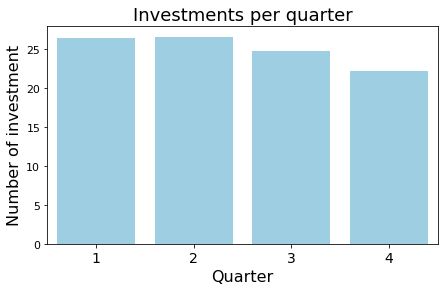

In [19]:
#Plotting funding frequency according to the quarter
plt.figure(figsize=(7,4))
sns.barplot(quarter.index, quarter.values, alpha=0.9,color='skyblue')
plt.title("Investments per quarter",fontsize=18)
plt.xlabel('Quarter',fontsize=16)
plt.ylabel('Number of investment',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=11)
plt.show()
#First 2 quarter seems to have slightly more funding than 3rd and 4th quarter

### 2) AmountInUSD

In [20]:
#Cleaning the target variable
df['AmountInUSD']=(df['AmountInUSD'].str.replace(',','')).astype('float')

In [21]:
#Making a function which gives 95% confidence point and interval, also the range between the lower and upper value.
import scipy.stats as stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    print('Confidence point:-',np.around(m,decimals=2))
    print('From:-',(np.around(m-h,decimals=2)))
    print('To:-',np.around(m+h,decimals=2))
    print('Range:-',(np.around((m+h)-(m-h),decimals=2)))
    

#Calculating 95% confidence interval for out target variable
mean_confidence_interval(df['AmountInUSD'].dropna())

Confidence point:- 12031073.1
From:- 8814823.9
To:- 15247322.3
Range:- 6432498.41


In [22]:
#Printing confidence interval as per year
for x in df['year'].value_counts().index:
    print(x)
    print('*'*30)
    mean_confidence_interval((df['AmountInUSD'][df['year']==x]).dropna())
    print('\n')

2016
******************************
Confidence point:- 6532574.42
From:- 4944105.32
To:- 8121043.51
Range:- 3176938.19


2015
******************************
Confidence point:- 13261502.09
From:- 9198794.18
To:- 17324210.0
Range:- 8125415.83


2017
******************************
Confidence point:- 20513247.37
From:- 6407395.9
To:- 34619098.83
Range:- 28211702.93




In [23]:
#Printing confidence interval for top all top3 categories
for cols in df.columns[0:6]:
    print(cols)
    for x in df[cols].value_counts()[0:3].index:
        print('*'*30)        

        print(x)
        
        print('*'*30)
        
        mean_confidence_interval((df['AmountInUSD'][df[cols]==x]).dropna())
        
        print('\n')

StartupName
******************************
Swiggy
******************************
Confidence point:- 24357142.86
From:- -249539.84
To:- 48963825.55
Range:- 49213365.39


******************************
UrbanClap
******************************
Confidence point:- 12140000.0
From:- -901491.99
To:- 25181491.99
Range:- 26082983.98


******************************
Paytm
******************************
Confidence point:- 713333333.33
From:- -952583079.06
To:- 2379249745.73
Range:- 3331832824.79


IndustryVertical
******************************
Consumer Internet
******************************
Confidence point:- 8236635.57
From:- 5589371.46
To:- 10883899.69
Range:- 5294528.23


******************************
Technology
******************************
Confidence point:- 5839119.05
From:- 3858374.24
To:- 7819863.85
Range:- 3961489.61


******************************
eCommerce
******************************
Confidence point:- 21616920.35
From:- -3224610.36
To:- 46458451.07
Range:- 49683061.42


SubVer

In [24]:
#Statistics for Amount of investment
#The amount that is invested seems to be very flexible
print('skewness',df['AmountInUSD'].skew())
print('kurtosis',df['AmountInUSD'].kurtosis())
print('median  ',df['AmountInUSD'].median())
print(df['AmountInUSD'].describe())


skewness 15.967621376772419
kurtosis 310.7964640883146
median   1070000.0
count    1.525000e+03
mean     1.203107e+07
std      6.403118e+07
min      1.600000e+04
25%      3.700000e+05
50%      1.070000e+06
75%      6.000000e+06
max      1.400000e+09
Name: AmountInUSD, dtype: float64


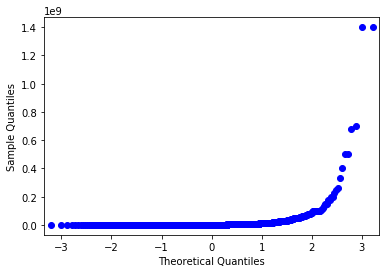

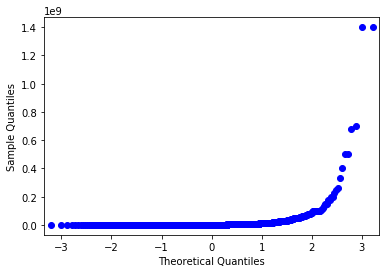

In [25]:
#Checking the distribution for the target variable AmountInUSD
import statsmodels.api as sm
sm.qqplot(df['AmountInUSD'].dropna())

In [26]:
#Analyzing the startup that got the max funding
df[df['AmountInUSD']==1400000000.0]

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,month,year,quarter,day,yearmonth
158,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,5,2017,2,18,201705
294,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,3,2017,1,21,201703


In [27]:
#Analyzing the startup that got the least funding
df[df['AmountInUSD']==16000]

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,month,year,quarter,day,yearmonth
2345,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,1,2015,1,19,201501
2346,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,1,2015,1,19,201501
2347,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,1,2015,1,19,201501
2348,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,1,2015,1,19,201501
2349,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,1,2015,1,19,201501


#### Before doing eda of categorical variables we will clean the data frame
#### After that we will divide the dataset into 2 different dataframes
#### 1) All the data with no null values of AmountInUSD
#### 1) All the data with only null values of AmountInUSD

In [28]:
#Before splitting the dataset we will first clean the data

### Startup Name

In [29]:
#There are many variables where the data is same but the name is different
#First we will lower all the strings
#Later we will personally rename all the variable names
df['StartupName']=df['StartupName'].str.lower()

In [30]:
df['StartupName']=df['StartupName'].replace("practo","practo")
df['StartupName']=df['StartupName'].replace("couponmachine.in","couponmachine")
df['StartupName']=df['StartupName'].replace("olacabs","ola cabs")
df['StartupName']=df['StartupName'].replace("ola","ola cabs")
df['StartupName']=df['StartupName'].replace("olipkart.com","flipkart")
df['StartupName']=df['StartupName'].replace("paytm marketplace","paytm")
df['StartupName'][df['StartupName']=='flipkart.com']='flipkart'

df['StartupName'][df['StartupName']=='oyo']='oyo rooms'

### Industry Vertical

In [31]:
df['IndustryVertical']=df['IndustryVertical'].str.lower()

### Industry Subvertical

In [32]:
df['SubVertical']=df['SubVertical'].str.lower()

### City Location

In [33]:
df['CityLocation']=df['CityLocation'].str.lower().str[0:2]

### Investor Name

In [34]:
df['InvestorsName']=df['InvestorsName'].str.split(expand=True)[0].str.lower()

### Investment Type

In [35]:
df['InvestmentType']=df['InvestmentType'].str.lower().str[0]

In [36]:
df.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,month,year,quarter,day,yearmonth
0,touchkin,technology,predictive care platform,ba,kae,p,1300000.0,1,2017,1,8,201701
1,ethinos,technology,digital marketing agency,mu,triton,p,NaN,2,2017,1,8,201702
2,leverage edu,consumer internet,online platform for higher education services,ne,kashyap,s,NaN,2,2017,1,8,201702
3,zepo,consumer internet,diy ecommerce platform,mu,kunal,s,500000.0,2,2017,1,8,201702
4,click2clinic,consumer internet,healthcare service aggregator,hy,narottam,s,850000.0,2,2017,1,8,201702


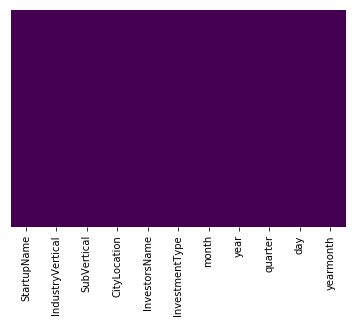

In [37]:
#Now we will create our 2 new dataframes
df_test=df[df['AmountInUSD'].isnull()]

df_test.drop('AmountInUSD',axis=1,inplace=True)

df_test=df_test.dropna()

sns.heatmap(df_test.isnull(),cbar=False,cmap='viridis',yticklabels=False)
#All null values were of year 2015
df_train=(df.dropna(subset=['AmountInUSD']))

# EDA of categorical variables

### 1) Startup Name


In [38]:
#Statistics for categorical variables
df.describe(include='object')

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType
count,2372,2201,1436,2193,2364,2371
unique,1916,728,1327,38,984,4
top,ola cabs,consumer internet,online pharmacy,ba,undisclosed,s
freq,9,772,9,635,119,1301


In [39]:
#Top 10 statups according to amount invested
(df[['StartupName','AmountInUSD']].dropna()).sort_values(by='AmountInUSD',ascending = False).head(10)



,StartupName,AmountInUSD
294,flipkart,1.400000e+09
158,paytm,1.400000e+09
1976,flipkart,7.000000e+08
1787,paytm,6.800000e+08
1572,ola cabs,5.000000e+08
1798,snapdeal,5.000000e+08
2148,ola cabs,4.000000e+08
252,ola cabs,3.300000e+08
217,ola cabs,2.600000e+08
234,oyo rooms,2.500000e+08


In [40]:
#Making a dataframe of top 20 start up name according to the amount that was invested in them

top20funding=(df[['StartupName','AmountInUSD']].dropna()).sort_values(by='AmountInUSD',ascending = False).head(20)

top20funding

,StartupName,AmountInUSD
294,flipkart,1.400000e+09
158,paytm,1.400000e+09
1976,flipkart,7.000000e+08
1787,paytm,6.800000e+08
1572,ola cabs,5.000000e+08
1798,snapdeal,5.000000e+08
2148,ola cabs,4.000000e+08
252,ola cabs,3.300000e+08
217,ola cabs,2.600000e+08
234,oyo rooms,2.500000e+08


In [41]:
#Counting the frequency of startups in top 20 startups that were funded
top20fundingcount=(df[['StartupName','AmountInUSD']].dropna()).sort_values(by='AmountInUSD',ascending = False).head(20)['StartupName'].value_counts()
top20fundingcount

ola cabs        5
paytm           3
snapdeal        2
flipkart        2
makemytrip      1
cartrade        1
quikr           1
hike            1
oyo rooms       1
bigbasket       1
grofers         1
ecom express    1
Name: StartupName, dtype: int64

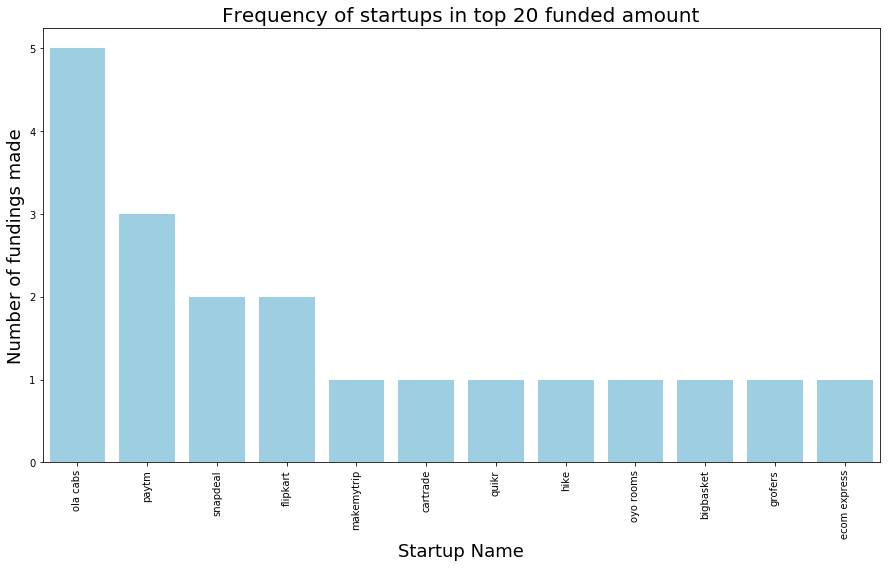

In [42]:
##Plotting the frequency of startups in top 20 startups that were funded

plt.figure(figsize=(15,8))
sns.barplot(top20fundingcount.index, top20fundingcount.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=18)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups in top 20 funded amount", fontsize=20)
plt.show()



In [43]:
#Creating a new dataframe with Startup name and the amount they got as funding
nameamount=df_train[['StartupName','AmountInUSD']]

In [44]:
#Grouping the dataframe according to startup name and sorting it out accoring to number of funding they recieved
nameamount=nameamount.groupby('StartupName').sum().sort_values(by='AmountInUSD',ascending=False)

#How much of funding is recieved by how much of startups
np.sum((nameamount/np.sum(nameamount)*100).head(53))

len(nameamount)

53/1268*100

4.17981072555205

#### 70% amount of funding is recieved by 4.1% of startup

### 2) Industry Vertical
#### ● Which industries are favored by investors for funding?


In [45]:
#Percentage of null values in dataframe
len(df[df['IndustryVertical'].isnull()==True])/len(df['IndustryVertical'])*100

7.209106239460371

In [46]:
#Industries that recieved funding more than 3 times
df_train['IndustryVertical'].value_counts()[df_train['IndustryVertical'].value_counts()>3]

consumer internet               461
technology                      189
ecommerce                       149
logistics                        16
healthcare                       15
education                        15
food & beverage                  12
finance                           7
online food delivery              5
others                            4
hyperlocal handyman services      4
Name: IndustryVertical, dtype: int64

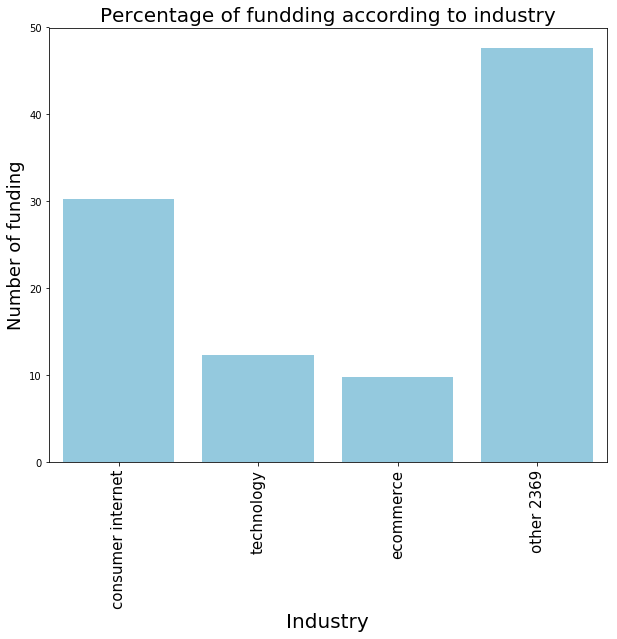

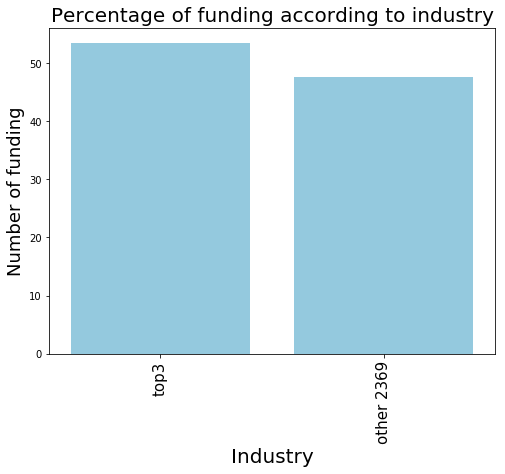

In [47]:
#Top 3 industries with most frequent funding recieved
(df_train['IndustryVertical'].value_counts()/len(df_train['IndustryVertical'])*100)[0:3]

x_barindustry=np.array(['consumer internet','technology','ecommerce','other 2369'])     
y_barindustry=np.array([30.229508,12.393443,9.770492,47.6])

plt.figure(figsize=(10,8))
sns.barplot(x_barindustry,y_barindustry,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of fundding according to industry", fontsize=20)

plt.show()

#Comparing investments of top 3 industries vs the rest
x_barindustry_top3=np.array(['top3','other 2369'])     
y_barindustry_top3=np.array([53.4,47.6])


plt.figure(figsize=(8,6))
sns.barplot(x_barindustry_top3,y_barindustry_top3,color='skyblue')
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Industry', fontsize=20)
plt.ylabel('Number of funding', fontsize=18)
plt.title("Percentage of funding according to industry", fontsize=20)

plt.show()

In [48]:
#Creating new dataframe with the industry name and amount invested in respective industries
indamount=df_train[['IndustryVertical','AmountInUSD']]

#Grouping the dataframe according to industries and sorting it according to the amount invested
indamount=indamount.groupby('IndustryVertical').sum().sort_values(by='AmountInUSD',ascending=False)

#How much investment is done in how many of industries?
np.sum((indamount/indamount.sum()*100).head(9))

len(indamount)

9/508*100



1.7716535433070866

#### 71.2% of investment is done in 1.7% industries

### 3) City Location
#### ● Do cities play a major role in funding?


In [49]:
#Creating new dataframe which is sorted according to frequency of investments that is allocated as per city
topcityfunded=df_train['CityLocation'].value_counts()[df_train['CityLocation'].value_counts()>10]

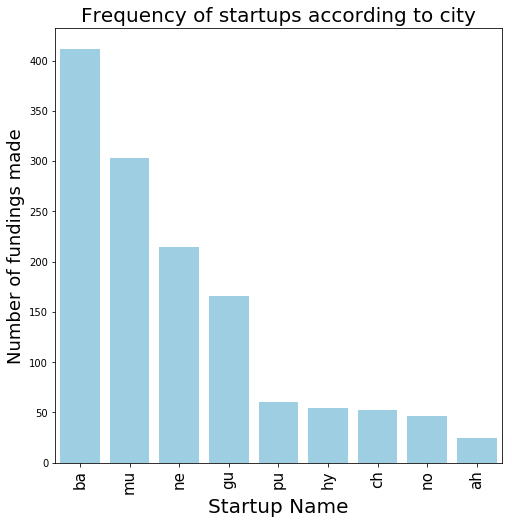

In [50]:
plt.figure(figsize=(8,8))
sns.barplot(topcityfunded.index, topcityfunded.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Startup Name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of startups according to city", fontsize=20)

plt.show()



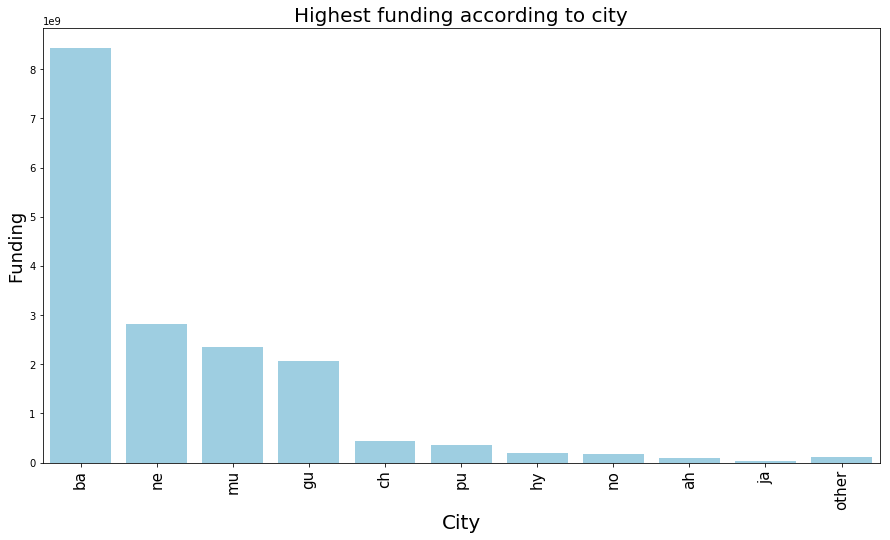

In [51]:
#Creating new dataframe which is sorted according to the amount of investment that is allocated
cityamount=df[['CityLocation','AmountInUSD']].dropna().sort_values(by='AmountInUSD')

cityamount=cityamount.groupby('CityLocation').sum().sort_values(by='AmountInUSD',ascending=False)

x_barcity=np.array(['ba', 'ne', 'mu', 'gu', 'ch', 'pu', 'hy', 'no', 'ah', 'ja','other'])
y_barcity=np.array([8.42297411e+09,
       2.82019750e+09,
       2.35493450e+09,
       2.06902150e+09,
       4.37205000e+08,
       3.66653000e+08,
       1.95362000e+08,
       1.70638000e+08,
       9.81860000e+07,
       3.55600000e+07,
            104791000.0
            ])

plt.figure(figsize=(15,8))
sns.barplot(x_barcity,y_barcity, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('City', fontsize=20)
plt.ylabel('Funding', fontsize=18)
plt.title("Highest funding according to city", fontsize=20)

plt.show()



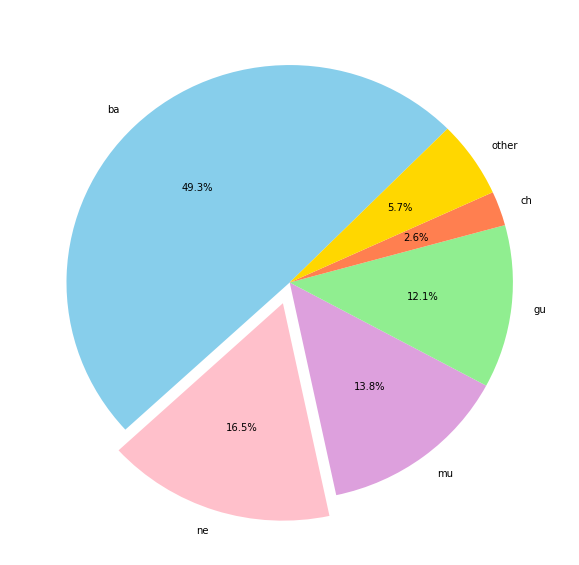

In [52]:
#Creating a pie diagram which shows how much funding is given as per cities
x_piecity=np.array(['ba', 'ne', 'mu', 'gu', 'ch', 'other'])
y_piecity=np.array([8.42297411e+09,
       2.82019750e+09,
       2.35493450e+09,
       2.06902150e+09,
       4.37205000e+08,
      971190000.0
            ])

plt.figure(figsize=(10,10))
plt.pie(y_piecity,labels=(x_piecity),autopct='%1.1f%%',colors=['skyblue','pink','plum','lightgreen','coral','gold'],explode=[0,0.1,0,0,0,0],startangle=45)
plt.rcParams['font.size'] = 16
plt.show()

In [53]:
#How much investment is done in how many of cities?

(np.sum((cityamount/np.sum(cityamount)*100)[0:4]))

len(cityamount)

4/32*100



12.5

#### 91.7% of investment is done in 12.5% of cities

### 4) Investor Name
#### ● Who are the important investors in the Indian Ecosystem?


In [54]:
#Top 10 investors according to frequency of funding
investorname=df['InvestorsName'].value_counts().head(10)
investorname

undisclosed    119
sequoia         55
accel           39
indian          37
kalaari         34
tiger           30
ratan           28
group           26
idg             25
saif            25
Name: InvestorsName, dtype: int64

In [55]:
#How much does the top 10 investors contribute in funding
np.sum((df_train['InvestorsName'].value_counts()/len(df_train['InvestorsName'])*100)[0:10])

22.032786885245905

In [56]:
#How much does the rest of investors contribute in funding
np.sum((df_train['InvestorsName'].value_counts()/len(df_train['InvestorsName'])*100)[10:])

77.63934426229507

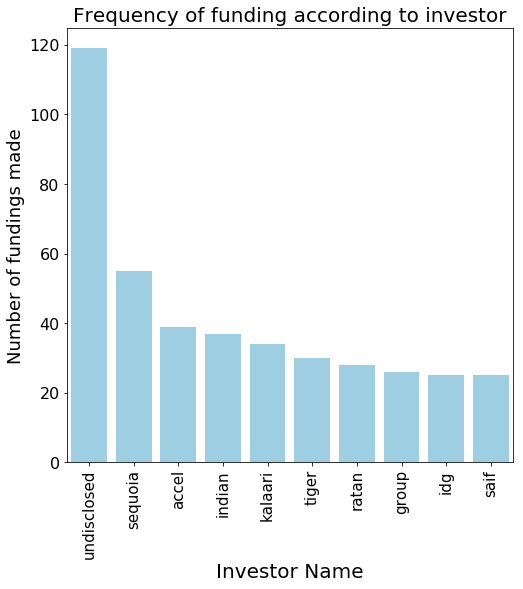

In [57]:
plt.figure(figsize=(8,8))
sns.barplot(investorname.index, investorname.values, alpha=0.9,color='skyblue')

plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Investor Name', fontsize=20)
plt.ylabel('Number of fundings made', fontsize=18)
plt.title("Frequency of funding according to investor", fontsize=20)

plt.show()



In [58]:
#Creating new data frame with only Investor names and the amount they invested
investoramount=df_train[['InvestorsName','AmountInUSD']]

In [59]:
investoramount.head(10)

,InvestorsName,AmountInUSD
0,kae,1300000.0
3,kunal,500000.0
4,narottam,850000.0
5,reliance,1000000.0
6,infuse,2600000.0
7,asset,20000000.0
8,kalaari,8500000.0
9,international,12000000.0
10,bccl,1000000.0
13,india,1000000.0


In [60]:
#Grouping investorname with the amount they have invested
investoramount=investoramount.groupby('InvestorsName').sum().sort_values(by='AmountInUSD',ascending=False)
investoramount.head(10)

,AmountInUSD
InvestorsName,
softbank,2.177000e+09
"microsoft,",1.400000e+09
alibaba,9.150000e+08
tiger,8.845500e+08
sequoia,8.529000e+08
steadview,7.000000e+08
"alibaba,",5.000000e+08
baillie,5.000000e+08
dst,4.000000e+08


In [61]:
#How much investment is done by how many of investors?
(np.sum((investoramount/np.sum(investoramount)*100)[0:36]))

len(investoramount)

36/703*100

5.120910384068279

#### 70.1% of investment is done by 5.1% of investors

### 5) Subvertical

In [62]:
#Creating new data frame with only Investor names and the amount they invested
subamount=df_train[['SubVertical','AmountInUSD']]

In [63]:
subamount=(subamount.groupby('SubVertical').sum()).sort_values(by='AmountInUSD',ascending=False)

In [64]:
#How much investment is done in Subvertical?

np.sum((subamount/np.sum(subamount)*100).head(39))

len(subamount)

39/815*100



4.785276073619632

#### 70.2% of investment is done in 4.7% of subvertical industries

In [65]:
#Grouping the data frame according to startup names
group=df_train.groupby('StartupName')

In [66]:
#Sorting the dataframe according to amount of funding and capturing the 4.1% of startup that got 70% of funding
topstartup=group.first().sort_values('AmountInUSD',ascending=False).head(53)

In [67]:
topstartup.head()

,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,month,year,quarter,day,yearmonth
StartupName,,,,,,,,,,,
paytm,ecommerce,mobile wallet & ecommerce platform,ba,softbank,p,1.400000e+09,5,2017,2,18,201705
oyo rooms,consumer internet,branded budget hotels aggregator,gu,softbank,p,2.500000e+08,4,2017,2,24,201704
snapdeal,ecommerce,horizontal online marketplace,ne,ontario,p,2.000000e+08,2,2016,1,15,201602
makemytrip,consumer internet,online travel/hotel booking platform,gu,ctrip.com,p,1.800000e+08,7,2016,3,1,201607
hike,consumer internet,mobile messaging app,ne,tencent,p,1.750000e+08,8,2016,3,16,201608


In [68]:
#Top frequency of all variables in this top topstartup dataframe
for x in topstartup.columns:
    print(x)
    print('*'*30)
    print(topstartup[x].value_counts()[topstartup[x].value_counts()>1])
    print('\n')

IndustryVertical
******************************
consumer internet    17
technology            4
ecommerce             3
healthcare            2
Name: IndustryVertical, dtype: int64


SubVertical
******************************
Series([], Name: SubVertical, dtype: int64)


CityLocation
******************************
ba    14
mu    11
gu     7
ne     6
ch     4
pu     3
Name: CityLocation, dtype: int64


InvestorsName
******************************
sequoia     4
softbank    3
temasek,    2
ta          2
tencent     2
warburg     2
goldman     2
Name: InvestorsName, dtype: int64


InvestmentType
******************************
p    53
Name: InvestmentType, dtype: int64


AmountInUSD
******************************
50000000.0     8
40000000.0     7
35000000.0     4
100000000.0    4
60000000.0     3
55000000.0     3
56000000.0     2
70000000.0     2
Name: AmountInUSD, dtype: int64


month
******************************
8     7
2     7
1     7
11    5
7     5
3     5
9     4
6     4
5     4
4  

In [69]:
#Percentage of top frequency of all variables in top topstartup dataframe
for x in topstartup.columns:
    print(x)
    print('*'*30)
    print((topstartup[x].value_counts()[topstartup[x].value_counts()/len(topstartup[x])*100>2])/len(topstartup[x])*100)
    print('\n')

IndustryVertical
******************************
consumer internet    32.075472
technology            7.547170
ecommerce             5.660377
healthcare            3.773585
Name: IndustryVertical, dtype: float64


SubVertical
******************************
Series([], Name: SubVertical, dtype: float64)


CityLocation
******************************
ba    26.415094
mu    20.754717
gu    13.207547
ne    11.320755
ch     7.547170
pu     5.660377
Name: CityLocation, dtype: float64


InvestorsName
******************************
sequoia     7.547170
softbank    5.660377
temasek,    3.773585
ta          3.773585
tencent     3.773585
warburg     3.773585
goldman     3.773585
Name: InvestorsName, dtype: float64


InvestmentType
******************************
p    100.0
Name: InvestmentType, dtype: float64


AmountInUSD
******************************
50000000.0     15.094340
40000000.0     13.207547
35000000.0      7.547170
100000000.0     7.547170
60000000.0      5.660377
55000000.0      5.660377


### Machine Learning

In [70]:
#Dropping the null values
df_train=df_train.dropna()

In [71]:
#As all our features are categorical we need to covert them into numerical type before fitting it into ml algorithm
from feature_engine import categorical_encoders as ce

In [72]:
#First we will split our data in training and testing dataset
from sklearn.cross_validation import train_test_split

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [73]:
X_df_train=df_train.drop('AmountInUSD',axis=1)
y_df_train=df_train['AmountInUSD']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_df_train, y_df_train, test_size=0.3, random_state=42)

In [75]:
#It is important to check if our training and testing data is in same shape
X_train.shape

(608, 11)

In [76]:
X_test.shape

(261, 11)

In [77]:
#Replaces categories by the mean of the target. 

#For example in the variable colour, if the mean of the target for blue, red
#and grey is 0.5, 0.8 and 0.1 respectively, blue is replaced by 0.5, red by 0.8
#and grey by 0.1.
ohe=ce.MeanCategoricalEncoder()

In [78]:
X_train=ohe.fit_transform(X_train,y_train)

In [79]:
X_test=ohe.fit_transform(X_test,y_test)

In [80]:
#To ease our job we will create a class 
#This class has function based on various machine learning algorithm
#We are using 5 algorithms which are as follows
#1) Logistic Regression
#2) Ada Boost Regressor
#3) Decision Tree Regressor
#4) Random Forest Regressor
#5) K nearest neighbor Regressor
#
#The specific function when called will do the following:-
#1) Fit the training data
#2) Predict the training data
#3) Predict the testing data
#4) Give output as r2 score, mae and mse for training as well as testing data. 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# to evaluate the models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error




class selmod():    
    def linr(x_tra,y_tra,x_tes,y_tes):
        print('Linear Regression')
        print('\n')
        lr=LinearRegression()
        lr.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtlr=lr.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtlr))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtlr))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtlr))

        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predlr=lr.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predlr))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predlr))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predlr))
        print('*'*80)
        
    def dectree(x_tra,y_tra,x_tes,y_tes):
        print('Decision Tree Regressor')
        print('\n')
        dt=DecisionTreeRegressor()
        dt.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtdc=dt.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtdc))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtdc))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtdc))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        preddc=dt.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,preddc))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,preddc))
        print('\n')
        print('mse:',mean_squared_error(y_tes,preddc))
        print('*'*80)
    
    def ranfo(x_tra,y_tra,x_tes,y_tes):
        print('Random Forest Regressor')
        print('\n')
        rf=RandomForestRegressor()
        rf.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtrf=rf.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtrf))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtrf))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtrf))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predrf=rf.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predrf))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predrf))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predrf))
        print('*'*80)
    
    def ada(x_tra,y_tra,x_tes,y_tes):
        print('Ada Boost Regressor')
        print('\n')
        ad=AdaBoostRegressor()
        ad.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtad=ad.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtad))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtad))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtad))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predad=ad.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predad))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predad))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predad))
        print('*'*80)
    
    def kneigh(x_tra,y_tra,x_tes,y_tes):
        print('KNN Regressor')
        print('\n')
        knn=KNeighborsRegressor()
        knn.fit(x_tra,y_tra)
        
        print('Training Validation','\n')
        predtknn=knn.predict(x_tra)
        print('R2: ','\n',r2_score(y_tra,predtknn))
        print('\n')
        print('mae:',mean_absolute_error(y_tra,predtknn))
        print('\n')
        print('mse:',mean_squared_error(y_tra,predtknn))
        print('*'*80)
        
        print('Testing Validation')
        print('\n')
        predknn=knn.predict(x_tes)
        print('R2: ','\n',r2_score(y_tes,predknn))
        print('\n')
        print('mae:',mean_absolute_error(y_tes,predknn))
        print('\n')
        print('mse:',mean_squared_error(y_tes,predknn))
        print('*'*80)

C:\Users\Omkar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [81]:
#Linear Regression
selmod.linr(X_train,y_train,X_test,y_test)

Linear Regression


Training Validation 

R2:  
 0.9608855536986284


mae: 3767997.298789429


mse: 149874961550049.72
********************************************************************************
Testing Validation


R2:  
 0.9760238103322526


mae: 3269519.0014561466


mse: 191811140035559.47
********************************************************************************


In [82]:
#Decision Tree
selmod.dectree(X_train,y_train,X_test,y_test)

Decision Tree Regressor


Training Validation 

R2:  
 1.0


mae: 0.0


mse: 0.0
********************************************************************************
Testing Validation


R2:  
 0.997617784987525


mae: 702277.7777777778


mse: 19057881326628.35
********************************************************************************


In [83]:
#Random Forest
selmod.ranfo(X_train,y_train,X_test,y_test)

Random Forest Regressor


Training Validation 

R2:  
 0.9293621430260347


mae: 1608445.9703947369


mse: 270663325165866.6
********************************************************************************
Testing Validation


R2:  
 0.9395463228908367


mae: 1959442.678927203


mse: 483633508340512.56
********************************************************************************


In [84]:
#KNN 
selmod.kneigh(X_train,y_train,X_test,y_test)

KNN Regressor


Training Validation 

R2:  
 0.6006936242173951


mae: 3330355.814473684


mse: 1530023645381606.0
********************************************************************************
Testing Validation


R2:  
 0.5324659657777484


mae: 4639138.013793103


mse: 3740303916190190.0
********************************************************************************


In [85]:
#Ada Boost
selmod.ada(X_train,y_train,X_test,y_test)

Ada Boost Regressor


Training Validation 

R2:  
 0.9887692607231118


mae: 4065424.0247239806


mse: 43032863212056.6
********************************************************************************
Testing Validation


R2:  
 0.9912584932570144


mae: 3741870.004807971


mse: 69932645563615.28
********************************************************************************


In [86]:
#For this dataset Linear Regression is the best model where our testing accuracy is 0.976 and training accuracy is 0.960


In [90]:
def create_word_cloud(X):
    """
    Create a word cloud
    """
    text = []
    for sentence in X:
        text.extend(sentence)
    textall = " ".join(text)
    wordcloud = WordCloud(max_font_size=40).generate(textall)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [88]:
from wordcloud import WordCloud

In [99]:
text = df.StartupName[0:100]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [109]:
text = []
for sentence in df.StartupName[0:100]:
    text.extend(sentence)
    

In [113]:
wordcloud = WordCloud().generate(df.StartupName[0:100])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [106]:
# Start with one review:


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textall)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.